# Sistemas Inteligentes para Bioinformática

Exemplos de validação de código. Deverá corrigir os imports e diretórios de acordo com a sua implementação.

In [1]:
from si.data import Dataset
from si.util import summary
import os

In [2]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/breast-bin.data')

## Labeled dataset

In [3]:
dataset = Dataset.from_data(filename, labeled=True)

In [4]:
dataset.X[:5, :]

array([[8., 4., 4., 1., 2., 9., 3., 3., 1.],
       [5., 1., 1., 3., 2., 1., 1., 1., 1.],
       [2., 1., 1., 1., 3., 1., 2., 1., 1.],
       [2., 1., 1., 1., 2., 1., 3., 1., 1.],
       [9., 5., 8., 1., 2., 3., 2., 1., 5.]])

In [5]:
dataset.y[:5]

array([1., 0., 0., 0., 1.])

In [6]:
print("Has label:", dataset.hasLabel())
print("Number of features:", dataset.getNumFeatures())
print("Number of classes:", dataset.getNumClasses())
summary(dataset)

Has label: True
Number of features: 9
Number of classes: 2


,mean,std,max,min
A,4.417740,2.813726,10.0,1.0
B,3.134478,3.049276,10.0,1.0
C,3.207439,2.969786,10.0,1.0
D,2.806867,2.853336,10.0,1.0
E,3.216023,2.212715,10.0,1.0
F,3.486409,3.619337,10.0,1.0
G,3.437768,2.436619,10.0,1.0
H,2.866953,3.051449,10.0,1.0
I,1.589413,1.713851,10.0,1.0
y,0.344778,0.475296,1.0,0.0


In [7]:
dataset.toDataframe()

,A,B,C,D,E,F,G,H,I,y
0,8.0,4.0,4.0,1.0,2.0,9.0,3.0,3.0,1.0,1.0
1,5.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
2,2.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,0.0
3,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
4,9.0,5.0,8.0,1.0,2.0,3.0,2.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
694,1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,0.0
695,5.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
696,5.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
697,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,0.0


## Standard Scaler

In [8]:
from si.util.scale import StandardScaler
sc = StandardScaler()
ds2 = sc.fit_transform(dataset)
summary(ds2)

,mean,std,max,min
A,3.303668e-16,7.917053,15.706950,-9.616582
B,7.344308e-16,9.298082,20.934869,-6.508611
C,6.353208e-17,8.819630,20.172453,-6.555622
D,1.749673e-15,8.141527,20.524426,-5.155599
E,-4.764906e-16,4.896110,15.011011,-4.903428
F,-8.045702e-15,13.099601,23.574881,-8.999153
G,1.222357e-15,5.937114,15.989662,-5.939914
H,7.496785e-16,9.311340,21.766129,-5.696911
I,-3.958048e-16,2.937284,14.414490,-1.010167
y,3.447783e-01,0.475296,1.000000,0.000000


# Feature Selection

In [9]:
from si.util.feature_selection import f_regression, KBest, VarianceThreshold

## Variance Threshold

In [10]:
vt = VarianceThreshold(8)
ds2 = vt.fit_transform(dataset)
summary(ds2)

,mean,std,max,min
B,3.134478,3.049276,10.0,1.0
C,3.207439,2.969786,10.0,1.0
D,2.806867,2.853336,10.0,1.0
F,3.486409,3.619337,10.0,1.0
H,2.866953,3.051449,10.0,1.0
y,0.344778,0.475296,1.0,0.0


## SelectKBest

In [11]:
# SelectKBest for classification
skb = KBest(5)
ds3 = skb.fit_transform(dataset)
summary(ds3)


,mean,std,max,min
A,4.417740,2.813726,10.0,1.0
G,3.437768,2.436619,10.0,1.0
B,3.134478,3.049276,10.0,1.0
C,3.207439,2.969786,10.0,1.0
F,3.486409,3.619337,10.0,1.0
y,0.344778,0.475296,1.0,0.0


# Clustering

In [12]:
from si.unsupervised import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# o dataset iris nao estava inicialmente no github
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")

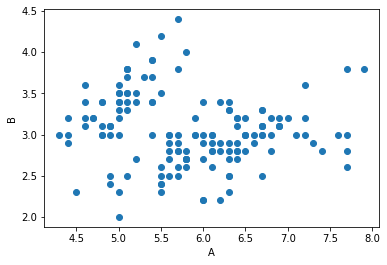

In [14]:
# indice das features para o plot
c1 = 0
c2 = 1
# plot
plt.scatter(iris.X[:,c1], iris.X[:,c2])
plt.xlabel(iris.xnames[c1])
plt.ylabel(iris.xnames[c2])
plt.show()

In [15]:
kmeans = KMeans(3)
cent, clust = kmeans.fit_transform(iris)
print(cent, clust)

[[6.593749999999997, 2.9843750000000004, 5.3734375000000005, 1.9078124999999995], [5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999], [5.672222222222221, 2.6722222222222216, 4.075, 1.2638888888888888]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 0 2 0 2
 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


TypeError: list indices must be integers or slices, not tuple

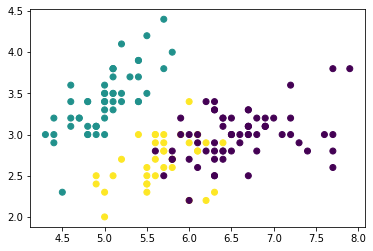

In [16]:

plt.scatter(iris.X[:,c1], iris.X[:,c2],c=clust)
plt.scatter(cent[:,c1],cent[:,c2], s = 100, c = 'black',marker='x')
plt.xlabel(iris.xnames[c1])
plt.ylabel(iris.xnames[c2])
plt.show()
# podem obter clusterings diferentes já que estes dependem da escolha dos centroids iniciais

# PCA

In [17]:
from si.unsupervised import PCA, SVD
pca = PCA(2, function=SVD)

In [18]:
reduced = pca.fit_transform(iris)
print(pca.variance_explained())

[0.9845342360298185, 0.011553806550214544, 0.0027639495610695484, 0.001148007858897667]


In [20]:
iris_pca = Dataset(reduced,iris.y,xnames=['pc1','pc2'],yname='class')
iris_pca.toDataframe()

,pc1,pc2,class
0,-4.260396,-0.207535,Iris-setosa
1,-4.286156,0.016796,Iris-setosa
2,-4.489096,0.114004,Iris-setosa
3,-4.163637,0.258754,Iris-setosa
4,-4.276894,-0.145422,Iris-setosa
...,...,...,...
145,2.728523,-0.175316,Iris-virginica
146,2.278912,0.117969,Iris-virginica
147,2.657819,-0.044866,Iris-virginica
148,2.986956,0.203586,Iris-virginica


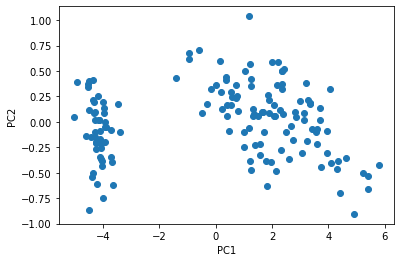

In [21]:
plt.scatter(iris_pca.X[:,0], iris_pca.X[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()